## This notebook generates Figure 1

In [3]:
import numpy as np
import pylab as plt

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import metrics

In [4]:
# create note that fades out
def create_reference_example():
    t = np.linspace(0,1,100)
    ref_pitch = np.zeros_like(t)
    ref_pitch[0:25] = 440  + 10 * np.sin(2*np.pi*8*t[0:25])
    ref_pitch[50:100] = 330  + 8 * np.sin(2*np.pi*8*t[50:100])

    decay_len = 30
    ref_conf = np.ones_like(t)
    ref_conf[-decay_len:] = np.linspace(1,0.01,decay_len) **2
    ref_conf[ref_pitch == 0] = 0
    ref_pitch[ref_conf == 0] = 0
    return t, ref_pitch, ref_conf

In [5]:
def identity_estimator(t, pitch, conf):
    return t, pitch, conf


def perfect_pitch_perfect_confidence(t, pitch):
    est_pitch = np.copy(pitch)
    conf = np.ones_like(t)
    conf[pitch==0] = 0
    return t, est_pitch, conf


def perfect_pitch_high_confidence(t, pitch):
    conf = np.ones_like(t) * 0.8
    est_pitch = np.copy(pitch)
    est_pitch[pitch==0] = 300  + 10 * np.sin(2*np.pi*8*t[pitch==0])
    conf[pitch==0] = 0.2
    return t, est_pitch, conf


def perfect_pitch_low_confidence(t, pitch):
    est_pitch = np.copy(pitch)
    conf = np.ones_like(t) * 0.2
    conf[est_pitch==0] = 0
    return t, est_pitch, conf


def wrong_pitch_low_confidence(t, pitch):
    est_conf = np.ones_like(t) * 0.2
    est_pitch = pitch / 3
    est_conf[est_pitch==0] = 0
    est_pitch[40:50] = 300  + 10 * np.sin(2*np.pi*8*t[40:50])
    est_conf[40:50] = 0.1
    return t, est_pitch, est_conf


def wrong_pitch_perfect_confidence(t, pitch):
    est_conf = np.ones_like(t)
    est_pitch = pitch / 3
    est_pitch[0:25] = pitch[0:25]
    est_conf[est_pitch==0] = 0
    return t, est_pitch, est_conf

In [6]:
def get_title(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf):
    sc = metrics.evaluate(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)
    title = "OA: {oa:0.2f}, RPA: {rpa:0.2f}\nVR: {vr:0.2f}, VFA: {vfa:0.2f} ".format(
    oa=sc['Overall Accuracy'], rpa=sc['Raw Pitch Accuracy'],
    vr = sc['Voicing Recall'], vfa = sc['Voicing False Alarm'])
    return title

def add_subplot(row, col, pos, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf,
                ylab=False, ytick=False, label = None):
    ax = plt.subplot(row, col, pos)
    ax.yaxis.tick_right()

    if not ytick:
        plt.yticks([], [])

    plt.plot(ref_times, ref_freqs, '.k', label='Active\nFreq.', markersize = 15)
    plt.plot(ref_times, est_freqs, '.r', label='Est\nFreq.')

    plt.ylim([min(ref_freqs)-10, max(ref_freqs)*1.2])
    plt.xticks([], [])
    if ylab:
        plt.ylabel("Freq (Hz)")
    plt.title(get_title(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf))

    ax = plt.subplot(row, col, pos+col)
    plt.plot(ref_times, ref_conf * (ref_freqs > 0).astype('float'), '--k', linewidth=5, label='Conf.')
    plt.plot(ref_times, (ref_conf * (ref_freqs > 0) > 0).astype('float'), '-k', linewidth=3, label='Conf.')
    plt.plot(ref_times, est_conf, '-r', linewidth=2, label='Est.\nConf.')
    plt.ylim([-0, 1.1])

    if not ylab:
        ax.yaxis.tick_right()
        plt.yticks([], [])
    if label is None:
        plt.xlabel("Time (sec)")
    else:     
        plt.xlabel("Time (sec)\n(" + label +")")

In [7]:
ref_times, ref_freqs, ref_conf = create_reference_example()

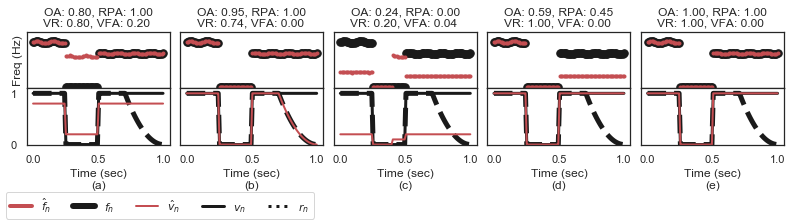

In [9]:
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='k', lw=6),
                Line2D([0], [0], color='r', lw=2, linestyle='-'),
                Line2D([0], [0], color='k', lw=3, linestyle='-'),
                Line2D([0], [0], color='k', lw=3, linestyle=':')]
custom_lab = ['$\hat{f}_n$', '$f_n$', '$\hat{v}_n$', '$v_n$', '$r_n$']

fig = plt.figure(figsize=(13, 3))
sns.set(font_scale=1.0)
sns.set_style('white')

est_times, est_freqs, est_conf = perfect_pitch_high_confidence(ref_times, ref_freqs)

add_subplot(2, 6, 1, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, ylab=True, label="a")

est_times, est_freqs, est_conf = identity_estimator(ref_times, ref_freqs, ref_conf)
add_subplot(2, 6, 2, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, label="b")

est_times, est_freqs, est_conf = wrong_pitch_low_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 3, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, label="c")

est_times, est_freqs, est_conf = wrong_pitch_perfect_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 4, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, label="d")

est_times, est_freqs, est_conf = perfect_pitch_perfect_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 5, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, label="e")

# this creates a warning - this is because we subtract np.inf - np.inf. It doesn't affect the final metrics
est_times, est_freqs, est_conf = perfect_pitch_low_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 6, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, label="f", ytick=True)

fig.legend(custom_lines, custom_lab, ncol=5, loc=3)

plt.tight_layout(pad=0.0, w_pad=0.1)
fig.subplots_adjust(bottom=0.36)
plt.savefig("../paper-figs/toy_ex.pdf", fmt='pdf', bbox_inches="tight")